### **Efek Alkohol Pada Prestasi Akademik Mahasiswa**

##### **Install Libraries Tambahan**

In [48]:
!pip install jcopml

##### **Import Libraries**

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Import Dataset**

In [50]:
data = pd.read_csv(r'student-mat.csv')

In [51]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [52]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [53]:
from jcopml.plot import plot_missing_value

,missing_value,%
school,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0
famsize,0,0.0
Pstatus,0,0.0
Medu,0,0.0
Fedu,0,0.0
Mjob,0,0.0
Fjob,0,0.0


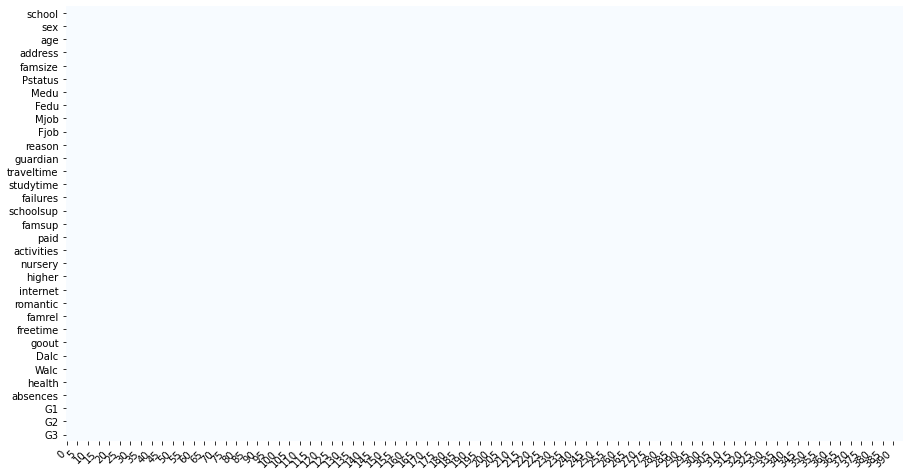

In [54]:
plot_missing_value(data, return_df=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### **Data Visualization**

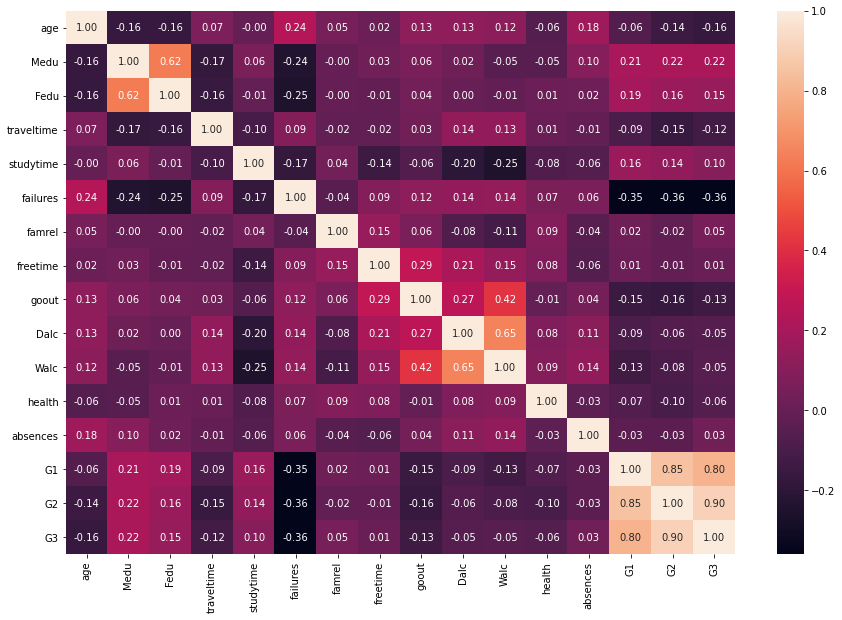

In [56]:
#Final grade = G3, weekly alcohol consumption = Dalc + Walc
#we need to know the correlation first
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cbar=True)

In [57]:
#only exam scores are highly correlated (G1, G2, G3)
#It means students take almost same scores grade at each exams

In [58]:
#Combining weekdays alcohol consumption with weekend alcohol consumption
data['Dalc'] = data['Dalc'] + data['Walc']
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,2,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,2,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,5,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,3,2,5,4,6,10,10


In [59]:
Dalc = data['Dalc'].value_counts()
Dalc

2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: Dalc, dtype: int64

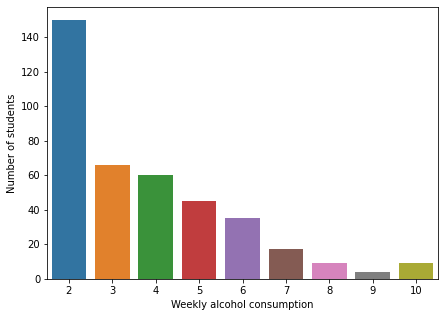

In [60]:
plt.figure(figsize=(7,5))
sns.barplot(x=Dalc.loc[:].index, y=Dalc.loc[:].values)
plt.xlabel('Weekly alcohol consumption')
plt.ylabel('Number of students')
plt.show()

Text(0.5, 0, 'Weekly alcohol consumption')

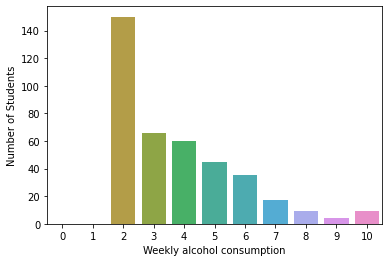

In [61]:
#Weekly alcohol consumption
list = []
for i in range(11):
    list.append(len(data[data['Dalc']==i]))
ax = sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y=list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

In [62]:
data.loc[: , ['Dalc', 'G3']].head()

,Dalc,G3
0,2,6
1,2,6
2,5,10
3,2,15
4,3,10


In [63]:
data['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

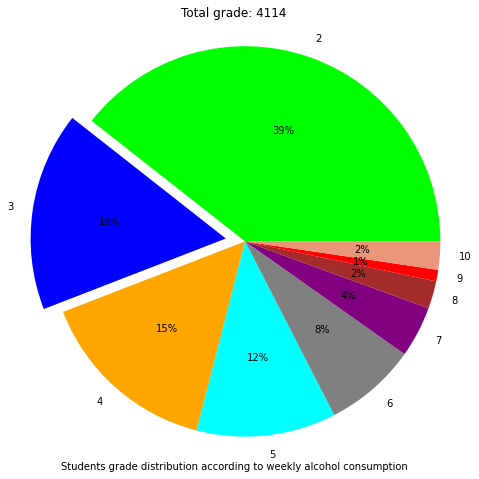

In [64]:
plt.figure(figsize=(8,8))
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime', 'blue', 'orange', 'cyan', 'grey', 'purple', 'brown', 'red', 'darksalmon']
# only "explode" the 2nd slice (i.e. '3')
explode = [0, 0.1, 0, 0, 0, 0, 0, 0, 0]
sizes = []
for i in range(2, 11):
    sizes.append(sum(data[data.Dalc == i].G3))
total_grade = sum(sizes)         
average = total_grade/float(len(data))
plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct= '%1.f%%')
#Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Total grade: ' + str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

Terlihat bahwa mahasiswa yang mengonsumsi alkohol 2 kali dalam seminggu cenderung lebih sukses daripada yang lain. Bagaimana pun kita tidak bisa memahami hal itu hanya dari grafik ini saja karena jumlah mahasiswa yang mengonsumsi alkohol 2 kali dalam seminggu lebih banyak daripada yang lain 

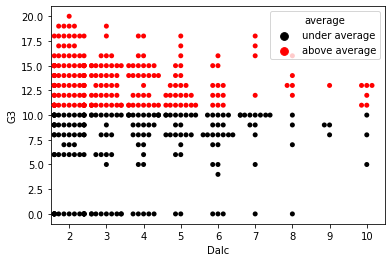

In [66]:
#Therefore, lets look at swarm plot to understand whether alcohol affects the success or not.
ave = sum(data['G3'])/float(len(data))
data['average_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data['G3']]
sns.swarmplot(x='Dalc', y='G3', hue='average', data=data, palette={'above average':'red', 'under average':'black'})

Seperti yang dapat dilihat pada swarm plot, mahasiswa yang mendapatkan nilai terbaik hanya mengonsumsi alkohol 2 kali dalam seminggu

In [68]:
data[data.Dalc==2].G3.value_counts()

11    17
0     17
15    15
10    14
13    12
9     12
14    11
12     9
8      9
6      8
18     7
16     7
19     4
17     4
7      3
20     1
Name: G3, dtype: int64

In [69]:
stu = sum(data[data['Dalc']==2].G3)/float(len(data[data['Dalc']==2]))
print('Students who consume alcohol two times a week, got average scores equal to %.2f' % stu)

Students who consume alcohol two times a week, got average scores equal to 10.81


Text(0.5, 0, 'Weekly alcohol consumption')

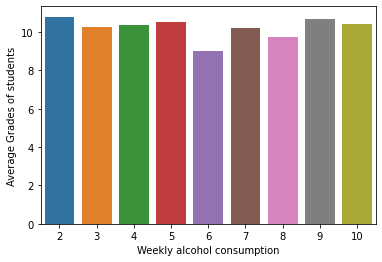

In [70]:
#Average grade for all students according to their alcohol consumption
list = []
for i in range(2, 11): #(2, 11) according to 'Dalc' column
    list.append(sum(data[data['Dalc']==i].G3)/float(len(data[data['Dalc']==i])))
sns.barplot(x=Dalc.loc[:].index, y=list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')